In [1]:
import numpy as np
import xgboost as xgb
from sklearn import datasets
from scipy.special import expit as sigmoid,logit

# Load data
iris = datasets.load_iris()
X, y = iris.data, (iris.target == 1).astype(int)

In [2]:
base_score = 0.5
n_rounds = 10
model = xgb.XGBClassifier(
    n_estimators=n_rounds,
    base_score=0.5,
    max_depth=10,
    use_label_encoder=False,
    objective='binary:logistic'
)
model.fit(X, y)
booster_ = model.get_booster()


/Users/mattis/fun/catboost/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:48:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: >

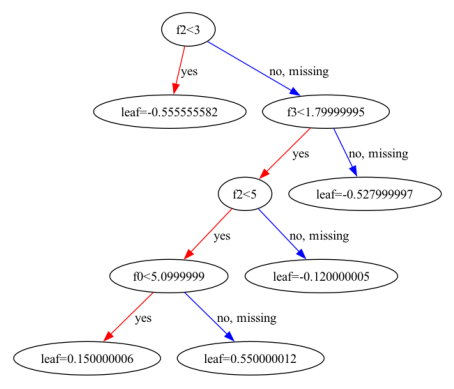

In [3]:
xgb.plot_tree(model, num_trees=0)

In [6]:
model.base_score

0.5

In [5]:
# Extract indivudual predictions
scores = np.full((X.shape[0],), logit(base_score))

individual_logits = []
for tree_ in booster_:
    X_margin = xgb.DMatrix(X, base_margin=scores)
    # get raw leaf value for accumulation
    scores = tree_.predict(
        X_margin, output_margin=True
    )
    individual_logits.append(
        scores
    )
    print(scores)
    print(individual_logits)
    break
individual_logits = np.vstack(individual_logits)

individual_preds = sigmoid(individual_logits)
final_preds = individual_preds[n_rounds-1,]
# Verify correctness
xgb_preds = booster_.predict(xgb.DMatrix(X))

np.testing.assert_almost_equal(final_preds, xgb_preds)

[-0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556 -0.5555556
 -0.5555556 -0.5555556  0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.15       0.55       0.55
  0.15       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55       0.55      -0.528      0.55
  0.55       0.55       0.55       0.55       0.55      -0.12
  0.55       0.55       0.55       0.55       0.55      -0.12
  0.55       0.55       0.55       0.55       0.55       0.55
  0.55       0.55       0.55  

IndexError: index 9 is out of bounds for axis 0 with size 1